In [1]:
using JLD2
using OffsetArrays
using RealNeuralNetworks.Neurons
using RealNeuralNetworks
using Plots
include(joinpath(Pkg.dir(), "RealNeuralNetworks/src/Utils/PlotRecipes.jl"))
using .PlotRecipes

const VOXEL_SIZE = (1000,1000,1000)

(1000, 1000, 1000)

In [2]:
groundTruthClassList = Vector{Set{Int}}()
push!(groundTruthClassList, Set([77648,77710,77300,77705]))
push!(groundTruthClassList, Set([77148,77625,77641,77692]))
push!(groundTruthClassList, Set([76355,76487,76267,76350]))
push!(groundTruthClassList, Set([77805,77460,77163,77797]))
push!(groundTruthClassList, Set([76189,76185,76877,76829]))
@show groundTruthClassList
@assert 77648 in groundTruthClassList[1]
groundTruthCellIdList = Vector{Int}()
for k in 1:5
    push!(groundTruthCellIdList, groundTruthClassList[k]...)
end
groundTruthCellIdList

groundTruthClassList = Set{Int64}[Set([77300, 77710, 77648, 77705]), Set([77641, 77692, 77148, 77625]), Set([76487, 76267, 76350, 76355]), Set([77805, 77163, 77460, 77797]), Set([76185, 76877, 76189, 76829])]


20-element Array{Int64,1}:
 77300
 77710
 77648
 77705
 77641
 77692
 77148
 77625
 76487
 76267
 76350
 76355
 77805
 77163
 77460
 77797
 76185
 76877
 76189
 76829

In [3]:
classificationIdList = groundTruthCellIdList

groundTruthClassAssignmentList = Vector{Int}()
for cellId in classificationIdList
    for (idx, s) in enumerate(groundTruthClassList)
        if cellId in s
            push!(groundTruthClassAssignmentList, idx)
            break
        end
    end
end
@show groundTruthClassAssignmentList

groundTruthClassAssignmentList = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]


20-element Array{Int64,1}:
 1
 1
 1
 1
 2
 2
 2
 2
 3
 3
 3
 3
 4
 4
 4
 4
 5
 5
 5
 5

# Hierachical clustering

In [4]:
N = length(groundTruthCellIdList)
distanceMatrix = zeros(Float64,N,N)
using ProgressMeter

@showprogress 1 "computing densitymap correlation..." for i in 1:length(groundTruthCellIdList)
    local densityMap1::Array{Float64,3}
    local densityMap2::Array{Float64,3}
    cellId1 = groundTruthCellIdList[i]
    jldopen("density_map/$(cellId1).jld") do f
        densityMap1 = f["densityMap"] |> parent
    end
    @show typeof(densityMap1)
    for j in i+1:length(groundTruthCellIdList)
        cellId2 = groundTruthCellIdList[j]
        println("reading the density map...")
        jldopen("density_map/$(cellId2).jld") do f
            @time densityMap2 = f["densityMap"] |> parent
        end
        println("computing distance...")
        @time distanceMatrix[i,j] = Neurons.get_arbor_density_map_overlap_min_distance(densityMap1, densityMap2)
        distanceMatrix[j,i] = distanceMatrix[i,j]
    end
end
@save "distance_matrix.jld" distanceMatrix


typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.322071 seconds (2.94 k allocations: 10.961 MiB, 1.95% gc time)
computing distance...
  1.996675 seconds (923.77 k allocations: 53.238 MiB, 0.74% gc time)
reading the density map...
  0.429460 seconds (207 allocations: 15.023 MiB, 4.73% gc time)
computing distance...
  0.118349 seconds (1.01 k allocations: 4.578 MiB)
reading the density map...
  0.260346 seconds (207 allocations: 8.952 MiB)
computing distance...
  0.110328 seconds (1.01 k allocations: 3.462 MiB)
reading the density map...
  0.988363 seconds (207 allocations: 37.073 MiB, 12.13% gc time)
computing distance...
  0.094718 seconds (1.01 k allocations: 6.893 MiB)
reading the density map...
  6.190109 seconds (207 allocations: 258.821 MiB, 0.26% gc time)
computing distance...
  0.402425 seconds (1.04 k allocations: 28.076 MiB, 32.32% gc time)
reading the density map...
  0.167280 seconds (207 allocations: 16.699 MiB, 69.16% gc time)
computing distance...
  0

computing densitymap correlation...  5%|█               |  ETA: 0:06:32

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.025688 seconds (207 allocations: 15.023 MiB, 71.98% gc time)
computing distance...
  0.030381 seconds (1.01 k allocations: 4.822 MiB)
reading the density map...
  0.003992 seconds (207 allocations: 8.952 MiB)
computing distance...
  0.022502 seconds (1.01 k allocations: 3.713 MiB)
reading the density map...
  0.152690 seconds (207 allocations: 37.073 MiB, 90.04% gc time)
computing distance...
  0.048146 seconds (1.01 k allocations: 6.880 MiB)
reading the density map...
  0.119663 seconds (207 allocations: 258.821 MiB, 14.78% gc time)
computing distance...
  0.372823 seconds (1.04 k allocations: 28.055 MiB, 35.92% gc time)
reading the density map...
  0.006864 seconds (207 allocations: 16.699 MiB, 9.77% gc time)
computing distance...
  0.026156 seconds (1.01 k allocations: 5.211 MiB)
reading the density map...
  0.015505 seconds (207 allocations: 23.258 MiB, 47.81% gc time)
computing distance...
  0.032834 seconds (1.

computing densitymap correlation... 10%|██              |  ETA: 0:03:38

 0.050395 seconds (1.01 k allocations: 7.642 MiB)
reading the density map...
  0.101715 seconds (207 allocations: 258.821 MiB, 14.73% gc time)
computing distance...
  0.349810 seconds (1.04 k allocations: 28.047 MiB, 35.14% gc time)
reading the density map...
  0.007068 seconds (207 allocations: 16.699 MiB, 11.18% gc time)
computing distance...
  0.032432 seconds (1.01 k allocations: 6.550 MiB)
reading the density map...
  0.637115 seconds (207 allocations: 23.258 MiB, 1.22% gc time)
computing distance...
  0.039650 seconds (1.01 k allocations: 7.901 MiB)
reading the density map...
  0.001100 seconds (207 allocations: 2.466 MiB)
computing distance...
  0.017621 seconds (1.00 k allocations: 3.897 MiB)
reading the density map...
  0.000613 seconds (206 allocations: 829.047 KiB)
computing distance...
  0.016087 seconds (1.00 k allocations: 3.925 MiB)
reading the density map...
  0.000830 seconds (207 allocations: 1.610 MiB)
computing distance...
  0.019112 seconds (1.00 k allocations: 3.9

computing densitymap correlation... 15%|██              |  ETA: 0:02:29

 0.041140 seconds (1.01 k allocations: 6.877 MiB)
reading the density map...
  6.577045 seconds (207 allocations: 258.821 MiB, 2.05% gc time)
computing distance...
  0.355118 seconds (1.04 k allocations: 28.329 MiB, 34.93% gc time)
reading the density map...
  0.006554 seconds (207 allocations: 16.699 MiB, 9.73% gc time)
computing distance...
  0.025601 seconds (1.02 k allocations: 5.057 MiB)
reading the density map...
  0.017114 seconds (207 allocations: 23.258 MiB, 49.60% gc time)
computing distance...
  0.032146 seconds (1.01 k allocations: 6.111 MiB)
reading the density map...
  0.001116 seconds (207 allocations: 2.466 MiB)
computing distance...
  0.012581 seconds (999 allocations: 2.700 MiB)
reading the density map...
  0.000611 seconds (206 allocations: 829.047 KiB)
computing distance...
  0.010111 seconds (1.00 k allocations: 2.691 MiB)
reading the density map...
  0.000864 seconds (207 allocations: 1.610 MiB)
computing distance...
  0.010739 seconds (1.00 k allocations: 2.703 M

computing densitymap correlation... 20%|███             |  ETA: 0:02:17

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.086535 seconds (207 allocations: 258.821 MiB, 0.85% gc time)
computing distance...
  0.258424 seconds (1.04 k allocations: 27.051 MiB, 5.89% gc time)
reading the density map...
  0.005858 seconds (207 allocations: 16.699 MiB)
computing distance...
  0.049947 seconds (1.01 k allocations: 7.513 MiB)
reading the density map...
  0.136978 seconds (207 allocations: 23.258 MiB, 92.98% gc time)
computing distance...
  0.064634 seconds (1.01 k allocations: 8.519 MiB)
reading the density map...
  0.001574 seconds (207 allocations: 2.466 MiB)
computing distance...
  0.046212 seconds (1.01 k allocations: 6.997 MiB)
reading the density map...
  0.000648 seconds (206 allocations: 829.047 KiB)
computing distance...
  0.044332 seconds (1.00 k allocations: 7.143 MiB, 5.54% gc time)
reading the density map...
  0.000640 seconds (207 allocations: 1.610 MiB)
computing distance...
  0.048118 seconds (1.01 k allocations: 7.079 MiB)
readi

computing densitymap correlation... 25%|████            |  ETA: 0:01:48

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.006154 seconds (207 allocations: 16.699 MiB)
computing distance...
  0.246305 seconds (1.04 k allocations: 27.176 MiB, 6.07% gc time)
reading the density map...
  0.131394 seconds (207 allocations: 23.258 MiB, 93.57% gc time)
computing distance...
  0.237405 seconds (1.04 k allocations: 26.770 MiB, 6.13% gc time)
reading the density map...
  0.001214 seconds (207 allocations: 2.466 MiB)
computing distance...
  0.330692 seconds (1.04 k allocations: 29.199 MiB, 35.81% gc time)
reading the density map...
  0.000638 seconds (206 allocations: 829.047 KiB)
computing distance...
  0.212371 seconds (1.04 k allocations: 29.677 MiB, 0.69% gc time)
reading the density map...
  0.000880 seconds (207 allocations: 1.610 MiB)
computing distance...
  0.233489 seconds (1.04 k allocations: 29.574 MiB, 6.40% gc time)
reading the density map...
  0.000836 seconds (207 allocations: 1.474 MiB)
computing distance...
  0.213367 seconds (1.0

computing densitymap correlation... 30%|█████           |  ETA: 0:01:58

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.008086 seconds (207 allocations: 23.258 MiB)
computing distance...
  0.036620 seconds (999 allocations: 5.667 MiB)
reading the density map...
  0.001106 seconds (207 allocations: 2.466 MiB)
computing distance...
  0.019548 seconds (1.01 k allocations: 4.250 MiB)
reading the density map...
  0.000460 seconds (206 allocations: 829.047 KiB)
computing distance...
  0.016476 seconds (1.00 k allocations: 4.323 MiB)
reading the density map...
  0.000836 seconds (207 allocations: 1.610 MiB)
computing distance...
  0.143722 seconds (1.01 k allocations: 4.267 MiB, 87.54% gc time)
reading the density map...
  0.000874 seconds (207 allocations: 1.474 MiB)
computing distance...
  0.019198 seconds (1.01 k allocations: 4.279 MiB)
reading the density map...
  0.029238 seconds (207 allocations: 82.215 MiB, 2.61% gc time)
computing distance...
  0.085670 seconds (1.01 k allocations: 13.931 MiB)
reading the density map...
  0.060908 se

computing densitymap correlation... 35%|██████          |  ETA: 0:01:36

 0.023852 seconds (1.01 k allocations: 5.533 MiB)
reading the density map...
  0.015178 seconds (207 allocations: 1.474 MiB, 94.18% gc time)
computing distance...
  0.023162 seconds (1.01 k allocations: 5.549 MiB)
reading the density map...
  0.144814 seconds (207 allocations: 82.215 MiB, 81.27% gc time)
computing distance...
  0.091655 seconds (1.01 k allocations: 15.449 MiB)
reading the density map...
  0.025787 seconds (207 allocations: 77.288 MiB, 2.97% gc time)
computing distance...
  0.085775 seconds (834 allocations: 10.874 MiB)
reading the density map...
  0.037135 seconds (207 allocations: 103.051 MiB, 8.68% gc time)
computing distance...
  0.106274 seconds (834 allocations: 15.239 MiB)
reading the density map...
  0.043044 seconds (207 allocations: 81.938 MiB, 37.95% gc time)
computing distance...
  0.091829 seconds (1.01 k allocations: 17.758 MiB)
reading the density map...
  0.126212 seconds (207 allocations: 14.898 MiB, 95.57% gc time)
computing distance...
  0.036601 seco

computing densitymap correlation... 40%|██████          |  ETA: 0:01:19

 0.073447 seconds (1.01 k allocations: 12.523 MiB)
reading the density map...
  0.040067 seconds (207 allocations: 77.288 MiB, 35.98% gc time)
computing distance...
  0.068760 seconds (1.01 k allocations: 11.713 MiB)
reading the density map...
  0.157237 seconds (207 allocations: 103.051 MiB, 77.65% gc time)
computing distance...
  0.090579 seconds (1.01 k allocations: 15.077 MiB)
reading the density map...
  0.030022 seconds (207 allocations: 81.938 MiB, 9.72% gc time)
computing distance...
  0.073552 seconds (1.01 k allocations: 13.242 MiB)
reading the density map...
  0.009922 seconds (207 allocations: 14.898 MiB, 41.36% gc time)
computing distance...
  0.018083 seconds (1.00 k allocations: 3.895 MiB)
reading the density map...
  0.003537 seconds (207 allocations: 9.047 MiB)
computing distance...
  0.014502 seconds (1000 allocations: 2.883 MiB)
reading the density map...
  0.013707 seconds (207 allocations: 26.823 MiB, 28.10% gc time)
computing distance...
  0.028894 seconds (1.01 k

computing densitymap correlation... 50%|████████        |  ETA: 0:00:56

 0.145050 seconds (207 allocations: 82.215 MiB, 80.73% gc time)
computing distance...
  0.073292 seconds (1.01 k allocations: 12.735 MiB)
reading the density map...
  0.025736 seconds (207 allocations: 77.288 MiB, 2.93% gc time)
computing distance...
  0.067492 seconds (1.01 k allocations: 11.901 MiB)
reading the density map...
  2.429508 seconds (207 allocations: 103.051 MiB, 0.15% gc time)
computing distance...
  0.093715 seconds (1.01 k allocations: 15.343 MiB)
reading the density map...
  0.029401 seconds (207 allocations: 81.938 MiB, 9.64% gc time)
computing distance...
  0.071765 seconds (1.01 k allocations: 13.497 MiB)
reading the density map...
  0.009952 seconds (207 allocations: 14.898 MiB, 45.20% gc time)
computing distance...
  0.016279 seconds (1.01 k allocations: 3.915 MiB)
reading the density map...
  0.003368 seconds (207 allocations: 9.047 MiB)
computing distance...
  0.011401 seconds (1.00 k allocations: 2.867 MiB)
reading the density map...
  0.013192 seconds (207 al

computing densitymap correlation... 55%|█████████       |  ETA: 0:00:49

 0.043375 seconds (207 allocations: 82.215 MiB, 36.20% gc time)
computing distance...
  0.072633 seconds (1.01 k allocations: 12.555 MiB)
reading the density map...
  0.141924 seconds (207 allocations: 77.288 MiB, 82.30% gc time)
computing distance...
  0.067798 seconds (1.01 k allocations: 11.753 MiB)
reading the density map...
  0.037507 seconds (207 allocations: 103.051 MiB, 9.40% gc time)
computing distance...
  0.087629 seconds (1.01 k allocations: 15.103 MiB)
reading the density map...
  0.029729 seconds (207 allocations: 81.938 MiB, 9.98% gc time)
computing distance...
  0.074723 seconds (1.01 k allocations: 13.254 MiB)
reading the density map...
  0.009643 seconds (207 allocations: 14.898 MiB, 41.79% gc time)
computing distance...
  0.016238 seconds (1.00 k allocations: 3.888 MiB)
reading the density map...
  0.003506 seconds (207 allocations: 9.047 MiB)
computing distance...
  0.011230 seconds (1.00 k allocations: 2.889 MiB)
reading the density map...
  0.013656 seconds (207 a

computing densitymap correlation... 65%|██████████      |  ETA: 0:00:34

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.048383 seconds (207 allocations: 103.051 MiB, 29.79% gc time)
computing distance...
  0.148617 seconds (1.00 k allocations: 16.222 MiB)
reading the density map...
  0.954824 seconds (207 allocations: 81.938 MiB, 13.24% gc time)
computing distance...
  0.132682 seconds (1.00 k allocations: 15.689 MiB)
reading the density map...
  0.023117 seconds (207 allocations: 14.898 MiB, 75.34% gc time)
computing distance...
  0.077656 seconds (1.01 k allocations: 11.279 MiB)
reading the density map...
  0.003293 seconds (207 allocations: 9.047 MiB)
computing distance...
  0.196051 seconds (834 allocations: 9.511 MiB, 62.07% gc time)
reading the density map...
  0.010553 seconds (207 allocations: 26.823 MiB, 7.20% gc time)
computing distance...
  0.086257 seconds (834 allocations: 10.141 MiB)
reading the density map...
  0.003527 seconds (207 allocations: 9.580 MiB)
computing distance...
  0.077820 seconds (834 allocations: 9.847

computing densitymap correlation... 70%|███████████     |  ETA: 0:00:28

typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.041819 seconds (207 allocations: 81.938 MiB, 35.04% gc time)
computing distance...
  0.151015 seconds (999 allocations: 15.386 MiB)
reading the density map...
  0.133636 seconds (207 allocations: 14.898 MiB, 95.72% gc time)
computing distance...
  0.100581 seconds (1.00 k allocations: 14.391 MiB)
reading the density map...
  0.019808 seconds (207 allocations: 9.047 MiB, 82.76% gc time)
computing distance...
  0.096743 seconds (834 allocations: 13.463 MiB)
reading the density map...
  0.134035 seconds (207 allocations: 26.823 MiB, 92.75% gc time)
computing distance...
  0.111627 seconds (834 allocations: 14.255 MiB)
reading the density map...
  0.004862 seconds (207 allocations: 9.580 MiB, 23.27% gc time)
computing distance...
  0.095422 seconds (834 allocations: 13.993 MiB)
typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.005659 seconds (207 allocations: 14.898 MiB)
computing distance...
  0.0871

computing densitymap correlation... 80%|█████████████   |  ETA: 0:00:17

 0.025224 seconds (1.01 k allocations: 4.788 MiB)
typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.129376 seconds (207 allocations: 26.823 MiB, 92.53% gc time)
computing distance...
  0.033309 seconds (1.01 k allocations: 6.153 MiB)
reading the density map...
  0.003573 seconds (207 allocations: 9.580 MiB)
computing distance...
  0.018310 seconds (1.01 k allocations: 4.092 MiB)
typeof(densityMap1) = Array{Float64,3}
reading the density map...
  0.003481 seconds (207 allocations: 9.580 MiB)
computing distance...
  0.032882 seconds (1.00 k allocations: 5.931 MiB)
typeof(densityMap1) = Array{Float64,3}


computing densitymap correlation...100%|████████████████| Time: 0:01:07


In [5]:

using Plots
histogram(distanceMatrix[:], nbins=30)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 0 
 
 
 100 
 
 
 200 
 
 
 300 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1

In [6]:
using Clustering
clust = Clustering.hclust( distanceMatrix, :average)

Clustering.Hclust{Float64}([-9 -10; -11 1; … ; -4 17; -3 18], [0.722181, 0.943351, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [3, 4, 5, 6, 7, 8, 11, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :average)

In [7]:
PlotRecipes.plot(clust)

In [8]:
reorderedDistancedMatrix = PlotRecipes.reorder_distance_matrix(distanceMatrix, clust)
Plots.heatmap(reorderedDistancedMatrix)

# evaluation of classification

In [9]:
numClusters = 5
classes = cutree(clust; k=numClusters)

adjustedRandIndex, randIndex, mirkinIndex, hubertIndex = Clustering.randindex(classes, groundTruthClassAssignmentList)
@show adjustedRandIndex, randIndex, mirkinIndex, hubertIndex
@show variationOfInformation = varinfo(numClusters, classes, numClusters, groundTruthClassAssignmentList)

(adjustedRandIndex, randIndex, mirkinIndex, hubertIndex) = (0.01877934272300472, 0.42105263157894735, 0.5789473684210527, -0.15789473684210525)
variationOfInformation = varinfo(numClusters, classes, numClusters, groundTruthClassAssignmentList) = 1.663553233343869


1.663553233343869

# visualize density map

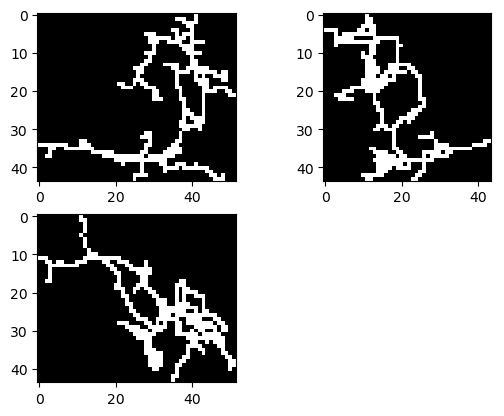

PyObject <matplotlib.image.AxesImage object at 0x7f1cadc263d0>

In [10]:
cellId1 = groundTruthCellIdList[1]
cellId2 = groundTruthCellIdList[2]
# @load "neuron/$(cellId1).jld" neuron; neuron1 = neuron
# @load "neuron/$(cellId2).jld" neuron; neuron2 = neuron
neuron1 = Neurons.load_swc_bin("swc.bin/$(cellId1).swc.bin") |> Neuron
neuron2 = Neurons.load_swc_bin("swc.bin/$(cellId2).swc.bin") |> Neuron
mask1 = Neurons.get_mask(neuron1, VOXEL_SIZE)
mask2 = Neurons.get_mask(neuron2, VOXEL_SIZE)
PlotRecipes.plot_mask(mask1 |> parent)

In [46]:
@show cellId1
@show cellId2

cellId1 = 77300
cellId2 = 77710


77710

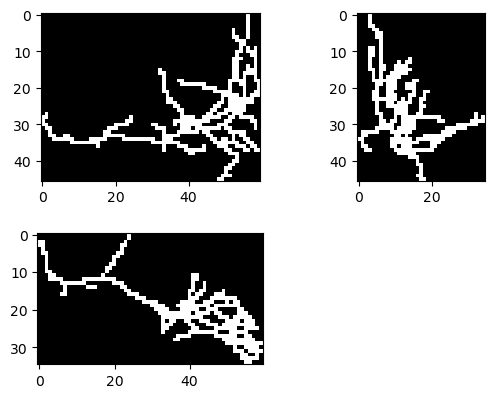

PyObject <matplotlib.image.AxesImage object at 0x7f1d00450490>

In [11]:
PlotRecipes.plot_mask(mask2 |> parent)

In [12]:
PlotRecipes.plot(neuron1)

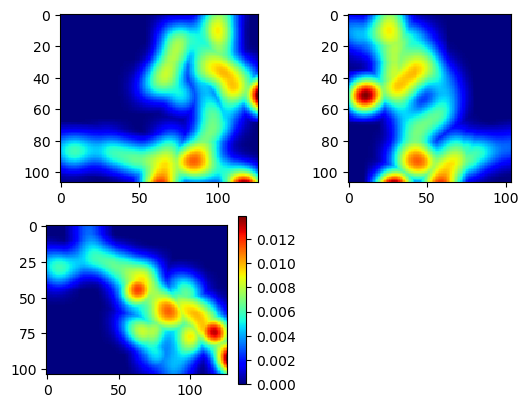

In [47]:
f=jldopen("density_map/$(cellId1).jld") 
densityMap1 = f["densityMap"] |> parent
close(f) 
f = jldopen("density_map/$(cellId2).jld")
densityMap2 = f["densityMap"] |> parent
close(f)

PlotRecipes.plot_arbor_density_map(densityMap1);
PyPlot.savefig(joinpath(homedir(), "Pictures/densitymap1.png"))

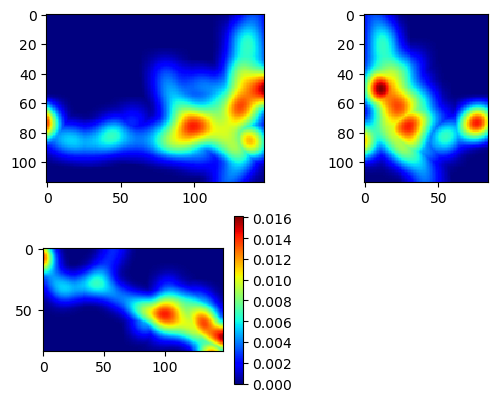

In [48]:
PlotRecipes.plot_arbor_density_map(densityMap2)
PyPlot.savefig(joinpath(homedir(), "Pictures/densitymap2.png"))

In [ ]:
"""
reimplementation from (scikit image)[https://github.com/scikit-image/scikit-image/blob/master/skimage/feature/template.py]

Match a template to a 2-D or 3-D image using normalized correlation.
    The output is an array with values between -1.0 and 1.0. The value at a
    given position corresponds to the correlation coefficient between the image
    and the template.
    For `pad_input=True` matches correspond to the center and otherwise to the
    top-left corner of the template. To find the best match you must search for
    peaks in the response (output) image.
    Parameters
    ----------
    image : (M, N[, D]) array
        2-D or 3-D input image.
    template : (m, n[, d]) array
        Template to locate. It must be `(m <= M, n <= N[, d <= D])`.
    pad_input : bool
        If True, pad `image` so that output is the same size as the image, and
        output values correspond to the template center. Otherwise, the output
        is an array with shape `(M - m + 1, N - n + 1)` for an `(M, N)` image
        and an `(m, n)` template, and matches correspond to origin
        (top-left corner) of the template.
    mode : see `numpy.pad`, optional
        Padding mode.
    constant_values : see `numpy.pad`, optional
        Constant values used in conjunction with ``mode='constant'``.
    Returns
    -------
    output : array
        Response image with correlation coefficients.
"""
function match_template(image::AbstractArray{N,Float64}, template::AbstractArray{N,Float64};
        pad_input=false, mode=:constant, constant_values=0)
    imageSize = size(image)
    padWidth = ()

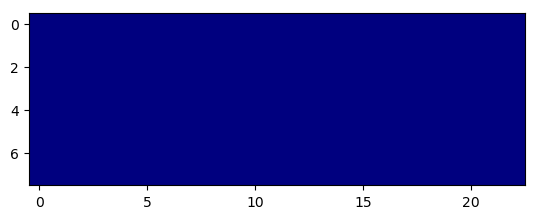

size(crossCorrelation) = (8, 23)
maximum(crossCorrelation) = 0.0


PyObject <matplotlib.image.AxesImage object at 0x7f1cf95bfd50>

In [15]:
# crossCorrelation = Alembic.normxcorr2(projection1, projection2)
# crossCorrelation = StatsBase.crosscor(projection1, projection2)
# crossCorrelation = correlate_image(projection2, projection1)
crossCorrelation = Neurons._cross_correlation_along_axis(densityMap1, densityMap2, 3)
@show size(crossCorrelation)
@show maximum(crossCorrelation)
PyPlot.imshow(crossCorrelation, "jet")

In [24]:
ENV["PYTHON"]="/usr/people/jingpeng/lib/anaconda3/bin/python"
Pkg.build("PyCall")

INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /usr/people/jingpeng/lib/anaconda3/bin/python (Python 3.6.3) at /usr/people/jingpeng/lib/anaconda3/bin/python, libpython = /usr/people/jingpeng/lib/anaconda3/lib/libpython3.6m
INFO: /usr/people/jingpeng/.julia/v0.6/PyCall/deps/deps.jl has not changed
INFO: /usr/people/jingpeng/.julia/v0.6/PyCall/deps/PYTHON has not changed


In [34]:
# pad image to be larger than template
@show size(densityMap1)
@show size(densityMap2)


size(densityMap1) = (107, 126, 104)
size(densityMap2) = (114, 148, 84)


114×148×84 Array{Float64,3}:
[:, :, 1] =
 -2.50044e-21  6.62659e-19   4.09733e-19  …   0.00160505   0.00144707 
 -6.74364e-20  6.17448e-19   3.30702e-19      0.00160405   0.0014449  
 -1.26868e-19  5.74766e-19   2.61482e-19      0.00159721   0.00143741 
 -1.82625e-19  5.18527e-19   1.84822e-19      0.00158917   0.0014285  
 -2.32969e-19  4.60309e-19   1.10715e-19      0.00157548   0.00141437 
 -2.80133e-19  3.95349e-19   4.38582e-20  …   0.00155567   0.00139457 
 -3.1744e-19   3.33031e-19  -2.4259e-20       0.00152926   0.00136874 
 -3.44113e-19  2.68613e-19  -7.94256e-20      0.00150694   0.00134702 
 -3.63876e-19  2.08154e-19  -1.24247e-19      0.00149096   0.0013315  
 -3.74615e-19  1.51097e-19  -1.63832e-19      0.00147363   0.00131509 
 -3.69649e-19  1.0809e-19   -1.78578e-19  …   0.00146863   0.00131027 
 -3.57686e-19  7.11919e-20  -1.85875e-19      0.0014847    0.00132525 
 -3.35402e-19  4.8517e-20   -1.78523e-19      0.00149058   0.00133112 
  ⋮                                 

In [39]:
using PyCall
function normalized_corr(densityMap1, densityMap2)
    bufferSize = map(max, size(densityMap1), size(densityMap2))
    buffer = zeros(Float64, bufferSize)
    buffer[1:size(densityMap2,1), 1:size(densityMap2,2), 1:size(densityMap2,3)] = densityMap2
    @pyimport skimage.feature.template as template
    corr = template.match_template(buffer, densityMap1, pad_input=true )
    return corr
end
corr = normalized_corr(densityMap1, densityMap2)

114×148×104 Array{Float64,3}:
[:, :, 1] =
  0.309964    -0.0112909  -0.0149277  …   0.219281   0.208756   0.197935
  0.319644    -0.0113514  -0.0150196      0.220462   0.209966   0.199181
  0.5146      -0.0113709  -0.0150675      0.221248   0.210789   0.20005 
  0.426796    -0.0113709  -0.0150675      0.221639   0.211226   0.200542
  0.620258    -0.0113709  -0.0150675      0.221613   0.211255   0.20064 
  0.49302     -0.0113709  -0.0150675  …   0.221114   0.210824   0.200291
  0.494059    -0.0113709  -0.0150675      0.220149   0.20994    0.199505
 -0.00283511  -0.0114321  -0.0150931      0.218722   0.208609   0.198286
 -0.00619177  -0.0127534  -0.0158414      0.216788   0.206785   0.196589
 -0.00834634  -0.0142914  -0.016922       0.21437    0.204492   0.19444 
 -0.00991831  -0.0155393  -0.018316   …   0.211505   0.201768   0.191876
 -0.0111954   -0.0160622  -0.0196285      0.208191   0.19861    0.188892
 -0.0125217   -0.0164574  -0.0205279      0.20446    0.19505    0.18552 
  ⋮      

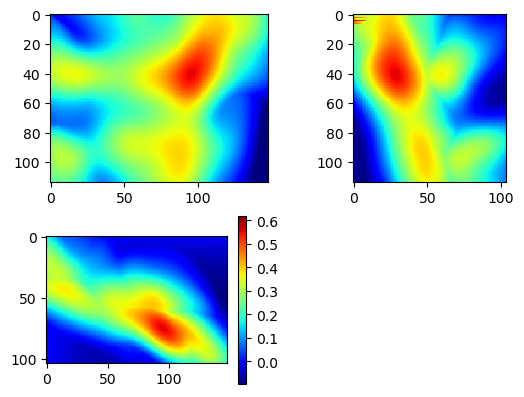

In [45]:
PlotRecipes.plot_arbor_density_map(corr)
PyPlot.savefig(joinpath(homedir(), "Pictures/corr.svg"))

In [44]:
PyPlot.savefig(joinpath(homedir(), "Pictures/corr.svg"))